<a href="https://colab.research.google.com/github/mellow-75/hackathon-/blob/main/IS_HCP_scaling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.ensemble
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier,HistGradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score ,f1_score,confusion_matrix

In [2]:
df=pd.read_csv("/content/drive/MyDrive/hackathon/Doceree-HCP_Train.csv", encoding = "latin=1")

In [ ]:
print("no of nan values : " ,df['ID'].isna().sum())
print(df.shape)

no of nan values :  0
(62723, 14)


In [ ]:
print("no of nan values : " ,df['DEVICETYPE'].isna().sum())
print(df.DEVICETYPE.value_counts())

no of nan values :  0
Desktop    43116
Mobile     17729
Tablet      1866
Unknown       12
Name: DEVICETYPE, dtype: int64


In [ ]:
print("no of nan values : " ,df['PLATFORM_ID'].isna().sum())
print(df.PLATFORM_ID.value_counts())

no of nan values :  0
2     43608
7     11508
9      2092
5      1739
6      1643
10      596
4       413
14      400
12      317
3       274
8        73
15       25
1        22
13       12
16        1
Name: PLATFORM_ID, dtype: int64


In [ ]:
print("no of nan values : " ,df['BIDREQUESTIP'].isna().sum())
print(df.BIDREQUESTIP.value_counts().head(60))

no of nan values :  0
71.105.120.171     936
142.154.205.202    644
68.132.98.211      490
108.175.114.101    396
108.175.114.100    394
162.17.102.153     353
173.66.114.27      348
12.218.110.242     309
65.216.253.25      290
150.148.14.137     286
99.160.6.197       265
129.176.151.15     258
65.112.8.18        228
23.125.217.54      227
24.102.87.62       211
69.92.49.4         196
38.240.111.51      190
47.189.55.180      184
71.87.24.123       180
198.184.147.58     151
128.146.52.108     144
67.203.36.94       142
71.66.42.242       133
67.203.36.81       126
128.146.189.103    120
24.45.121.35       117
50.26.129.135      116
209.126.104.10     113
98.110.76.22       111
209.126.104.7      109
207.38.89.236      108
66.249.66.73       108
139.52.18.237      107
207.38.87.145      103
66.249.66.75       102
209.126.127.71     101
68.175.60.169       99
209.126.103.138     97
35.129.213.194      96
216.24.45.43        95
174.66.101.238      94
209.126.124.58      93
170.212.0.93

In [ ]:
print("no of nan values : " ,df['USERPLATFORMUID'].isna().sum())
print(df.USERPLATFORMUID.value_counts().head(20))

no of nan values :  1
3e2578c8-f794-41af-a38c-c5cfb3c0f014    798
d76f7c0b-1a64-4d4b-b36d-86c832be8837    782
fcd3d327-0ad5-425e-8ea8-33ffe6a31543    353
d00f28d6-3a50-46cd-92f3-8601bd57ad0e    348
fe53f32c-4646-4abe-afea-90b21d6b8531    330
73828378-8999-4670-a3bf-e5e78096301c    286
82fcc028-f146-4efb-b95e-69fd62109bbc    284
fa24a307-1001-4f5e-9d87-669e91737c07    265
f6890950-af86-4400-ab0b-e8498d0ba99e    242
6b1794db-cc22-4f66-b185-ecd99146bb07    228
a4706c21-3ce1-453d-b57c-1541c50d15f5    227
d9f89efd-0f02-4844-9719-098302c545df    212
c42db189-7d1b-4639-b9c6-9fa4d80be4bd    195
72cbb382-31dd-4e2a-9e9c-9d0f40a7d0a9    193
29903453-4c40-4f25-98a5-ddc554f71555    190
9fee45ce-0010-40e0-a272-6c1c4f86ea00    180
cd57e558-f19d-4cd8-afcc-d0fa18259173    178
63238044-b275-480b-a613-780d45d2f70a    167
456631b8-ca59-4e7a-96a0-53bcbf85eaef    142
722fe815-ed32-4bff-ad66-03edf6d910dd    142
Name: USERPLATFORMUID, dtype: int64


In [ ]:
print("no of nan values : " ,df['USERCITY'].isna().sum())
print(df.USERCITY.value_counts().head(60))

no of nan values :  3497
New York              2739
Brooklyn              1773
St Louis              1411
Los Angeles           1173
Houston                997
Queens                 909
Arlington              776
Chicago                770
Philadelphia           643
Columbus               626
Miami                  555
Phoenix                509
Deer Park              497
San Francisco          479
Fort Worth             466
Rochester              446
Dallas                 441
Charlotte              401
Memphis                389
Palm Beach Gardens     376
Pittsburgh             370
Seattle                368
Rockville              328
Atlanta                328
Durham                 323
Minneapolis            304
Washington             302
Springfield            299
Cambridge              295
Denver                 289
Portland               286
Cleveland              285
San Diego              273
Tampa                  267
Jacksonville           251
Orlando                249
Bue

In [ ]:
print("no of nan values : " ,df['USERZIPCODE'].isna().sum())
print(df.USERZIPCODE.value_counts())

no of nan values :  2510
63169.0        1191
11226.0         959
10001.0         658
22202.0         640
90060.0         576
               ... 
317686772.0       1
60465.0           1
80124.0           1
76012.0           1
83647.0           1
Name: USERZIPCODE, Length: 9527, dtype: int64


In [ ]:
print("no of nan values : " ,df['USERAGENT'].isna().sum())


no of nan values :  1


In [ ]:
print("no of nan values : " ,df['PLATFORMTYPE'].isna().sum())
print(df.PLATFORMTYPE.value_counts())

no of nan values :  0
Online Medical Journal      60620
Online Learning Portal       1643
Medical News Platform         437
Electronic Health Record       22
Tele-medicine Platform          1
Name: PLATFORMTYPE, dtype: int64


In [ ]:
print("no of nan values : " ,df['CHANNELTYPE'].isna().sum())
print(df.CHANNELTYPE.value_counts())

no of nan values :  0
Website    62723
Name: CHANNELTYPE, dtype: int64


In [ ]:
print("no of nan values : " ,df['URL'].isna().sum())
print(df.URL.nunique())

no of nan values :  0
4084


In [ ]:
print("no of nan values : " ,df['KEYWORDS'].isna().sum())
print(df.KEYWORDS.nunique())

no of nan values :  0
2136


In [ ]:
df.head()

,ID,DEVICETYPE,PLATFORM_ID,BIDREQUESTIP,USERPLATFORMUID,USERCITY,USERZIPCODE,USERAGENT,PLATFORMTYPE,CHANNELTYPE,URL,KEYWORDS,TAXONOMY,IS_HCP
0,1001,Desktop,2,170.173.0.22,6974dcaa-f932-480e-9fb5-c52e20e1393a,Portland,97206.0,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,Online Medical Journal,Website,https://www.cancertherapyadvisor.com/home/canc...,General|Endocrine|False|Medicine|Surgery|Urolo...,NaN,0.0
1,1002,Desktop,2,65.216.253.25,c12f3f8f-8fcf-484a-90e1-1ac04db8cdcf,Arlington,22202.0,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,Online Medical Journal,Website,https://www.cancertherapyadvisor.com/home/deci...,Bone Marrow|Radiography|Chronic|Oncology|Psych...,NaN,0.0
2,1003,Desktop,2,66.232.79.22,a698de4b-e200-46dd-b5fb-40402175ae18,New Meadows,83654.0,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,Online Medical Journal,Website,https://www.cancertherapyadvisor.com/home/canc...,General|Endocrine|False|Medicine|Surgery|Urolo...,NaN,0.0
3,1004,Desktop,3,137.54.125.246,45967533-75c8-4fbd-a00c-e6ff20447aaa,NaN,229114624.0,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,Online Medical Journal,Website,https://globalrph.com/medcalcs/warfarin-mainte...,Dental|Total|Clinical|Pharmacology|Physicians|...,2084P0800X,1.0
4,1005,Mobile,7,174.202.231.99,a17e25be-532d-4cf5-b916-9308c8c3961f,Houston,77008.0,Mozilla/5.0 (iPhone; CPU iPhone OS 16_1_1 like...,Online Medical Journal,Website,https://www.cureus.com/articles/58184-a-review...,Critical Care|Emergency Medicine|General Pract...,NaN,0.0


In [ ]:
print("no of nan values : " ,df['IS_HCP'].isna().sum())

no of nan values :  1


In [ ]:
print("no of nan values : " ,df['TAXONOMY'].isna().sum())
print(df.TAXONOMY.value_counts())

no of nan values :  44921
2084P0800X    4391
2084N0400X    3634
207Q00000X    2166
207R00000X    1732
208000000X     469
              ... 
2086X0206X       1
207WX0200X       1
111N00000X       1
2086S0129X       1
207ND0101X       1
Name: TAXONOMY, Length: 189, dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62723 entries, 0 to 62722
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               62723 non-null  int64  
 1   DEVICETYPE       62723 non-null  object 
 2   PLATFORM_ID      62723 non-null  int64  
 3   BIDREQUESTIP     62723 non-null  object 
 4   USERPLATFORMUID  62722 non-null  object 
 5   USERCITY         59226 non-null  object 
 6   USERZIPCODE      60213 non-null  float64
 7   USERAGENT        62722 non-null  object 
 8   PLATFORMTYPE     62723 non-null  object 
 9   CHANNELTYPE      62723 non-null  object 
 10  URL              62723 non-null  object 
 11  KEYWORDS         62723 non-null  object 
 12  TAXONOMY         17802 non-null  object 
 13  IS_HCP           62722 non-null  float64
dtypes: float64(2), int64(2), object(10)
memory usage: 6.7+ MB


In [ ]:
df.dtypes

ID                   int64
DEVICETYPE          object
PLATFORM_ID          int64
BIDREQUESTIP        object
USERPLATFORMUID     object
USERCITY            object
USERZIPCODE        float64
USERAGENT           object
PLATFORMTYPE        object
CHANNELTYPE         object
URL                 object
KEYWORDS            object
TAXONOMY            object
IS_HCP             float64
dtype: object

<ipython-input-68-11928c89b839>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.matshow(df.corr())


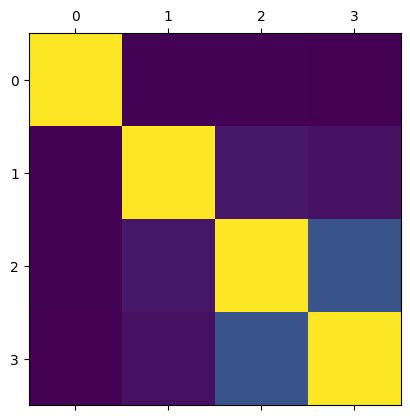

In [ ]:
plt.matshow(df.corr())
plt.show()

In [ ]:
a=df[["TAXONOMY","IS_HCP"]]

In [ ]:
print(a.iloc[:50])

      TAXONOMY  IS_HCP
0          NaN     0.0
1          NaN     0.0
2          NaN     0.0
3   2084P0800X     1.0
4          NaN     0.0
5          NaN     0.0
6          NaN     0.0
7          NaN     0.0
8   2084P0804X     1.0
9          NaN     0.0
10         NaN     0.0
11         NaN     0.0
12         NaN     0.0
13         NaN     0.0
14         NaN     0.0
15         NaN     0.0
16         NaN     0.0
17         NaN     0.0
18         NaN     0.0
19         NaN     0.0
20         NaN     0.0
21  2084N0400X     1.0
22         NaN     0.0
23         NaN     0.0
24         NaN     0.0
25         NaN     0.0
26         NaN     0.0
27         NaN     0.0
28         NaN     0.0
29  2084V0102X     1.0
30         NaN     0.0
31         NaN     0.0
32         NaN     0.0
33         NaN     0.0
34         NaN     0.0
35  207RC0000X     1.0
36         NaN     0.0
37         NaN     0.0
38         NaN     0.0
39         NaN     0.0
40         NaN     0.0
41         NaN     0.0
42         

In [ ]:
df['TAXONOMY'].value_counts()

2084P0800X    4391
2084N0400X    3634
207Q00000X    2166
207R00000X    1732
208000000X     469
              ... 
2086X0206X       1
207WX0200X       1
111N00000X       1
2086S0129X       1
207ND0101X       1
Name: TAXONOMY, Length: 189, dtype: int64

In [4]:
def scale(x):
  sclr = StandardScaler()
  x = sclr.fit_transform(x)
  return x

In [5]:
def ohe(df,col):
  df = pd.get_dummies(df,columns = [col])
  return df

In [6]:
def drp(df):
  df.drop(['USERPLATFORMUID','USERCITY','USERAGENT','CHANNELTYPE','URL'],axis = 1,inplace = True)
  return df

In [7]:
tfidf = TfidfVectorizer(tokenizer=lambda x: x.split('|'))
vectorizer = TfidfVectorizer()

In [ ]:
#feature_matrix=vectorizer_1.fit_transform(df["BIDREQUESTIP"])
#vectorized_bidrequestip=pd.DataFrame(feature_matrix.toarray())
#vectorizer_2 = TfidfVectorizer(tokenizer=lambda x: x.split('|'))
#tfidf_matrix = vectorizer_2.fit_transform(df['KEYWORDS'])
#vectorized_keywords = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer_2.get_feature_names_out())
#df = pd.concat([df,vectorized_bidrequestip,vectorized_keywords],axis = 1)
#df.drop(['BIDREQUESTIP','KEYWORDS'],axis = 1,inplace = True)

In [8]:
bid = vectorizer.fit_transform(df['BIDREQUESTIP'])
bid = pd.DataFrame(bid.toarray())

In [9]:
kywrd = tfidf.fit_transform(df['KEYWORDS'])
kywrd = pd.DataFrame(kywrd.toarray(),columns =tfidf.get_feature_names_out())

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [11]:
bid.head()

,0,1,2,3,4,5,6,7,8,9,...,236,237,238,239,240,241,242,243,244,245
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.48034


In [12]:
kywrd.head()

,,abatacept,ablation techniques,abortion,abscess,acanthamoeba keratitis,acetaminophen,acid-base imbalance,aco,acos,...,wheezing,whipple disease,whole genome sequencing,whooping cough,wound infection,yaws,yellow fever,zoonoses,zostavax,zoster sine herpete
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
df = pd.concat([df,bid,kywrd],axis = 1)

Dropping certain fixed columns


In [11]:
del kywrd
del bid

In [12]:
df = drp(df)

Performing One Hot Encoding over certian columns

In [13]:
df = ohe(df,"DEVICETYPE")
df = ohe(df,"PLATFORMTYPE")

In [15]:
df = df.drop(['BIDREQUESTIP','KEYWORDS'],axis = 1)

Taking care of null values

In [16]:
df_hcp = df.drop(['TAXONOMY'],axis = 1)

In [17]:
id = df_hcp['ID']
df_hcp = df_hcp.drop(['ID'],axis = 1)

In [18]:
df_hcp = df_hcp.dropna(how = 'any',axis = 0)

In [44]:
df_hcp.head()

,PLATFORM_ID,USERZIPCODE,IS_HCP,0,1,2,3,4,5,6,...,zoster sine herpete,DEVICETYPE_Desktop,DEVICETYPE_Mobile,DEVICETYPE_Tablet,DEVICETYPE_Unknown,PLATFORMTYPE_Electronic Health Record,PLATFORMTYPE_Medical News Platform,PLATFORMTYPE_Online Learning Portal,PLATFORMTYPE_Online Medical Journal,PLATFORMTYPE_Tele-medicine Platform
0,2,97206.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1,0,0,0,0,0,0,1,0
1,2,22202.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1,0,0,0,0,0,0,1,0
2,2,83654.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1,0,0,0,0,0,0,1,0
3,3,229114624.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1,0,0,0,0,0,0,1,0
4,7,77008.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,1,0,0,0,0,0,1,0


In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score,train_test_split

In [53]:
X = df_hcp.drop('IS_HCP',axis = 1).to_numpy()
#X.columns = X.columns.astype(str)
X = scale(X)
y = df_hcp['IS_HCP'].to_numpy()
y = y.reshape(-1,1)

In [54]:
print(X.shape,y.shape)

(109344, 1473) (109344, 1)


In [55]:
clf = RandomForestClassifier( n_estimators = 100 ,random_state = 42)

In [56]:
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size = 0.4)

In [ ]:
clf.fit(X_train,y_train)

In [ ]:
scores = cross_val_score(clf, X , y , cv=5)
scores.mean()

In [57]:
hclf = HistGradientBoostingClassifier()
hclf.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


HistGradientBoostingClassifier()

In [58]:
y_val_pred = hclf.predict(X_val)

In [59]:
f1_score(y_val,y_val_pred)

0.9653343157119174

In [60]:
df_test = pd.read_csv('/content/drive/MyDrive/hackathon/Doceree-HCP_Test.csv')

In [61]:
df_test.isnull().sum()

ID                    0
DEVICETYPE            0
PLATFORM_ID           0
BIDREQUESTIP          0
USERPLATFORMUID       0
USERCITY           1559
USERZIPCODE        1115
USERAGENT             1
PLATFORMTYPE          0
CHANNELTYPE           0
URL                   0
KEYWORDS              0
dtype: int64

In [62]:
bid = vectorizer.transform(df_test['BIDREQUESTIP'])
bid = pd.DataFrame(bid.toarray())

In [63]:
kywrd = tfidf.transform(df_test['KEYWORDS'])
kywrd = pd.DataFrame(kywrd.toarray(),columns = tfidf.get_feature_names_out())

In [64]:
df_test = pd.concat([df_test,bid,kywrd],axis=1)

In [32]:
null = dict(df_test.isnull().sum())

In [33]:
keys = null.keys()
for key in keys:
  if(null[key] == 1):
    print("there is null value")

there is null value


there are no null values n df_test

In [65]:
id_t = df_test['ID']
df_test = drp(df_test)
df_test = df_test.drop(['BIDREQUESTIP','KEYWORDS','ID'],axis = 1)
df_test = ohe(df_test,'DEVICETYPE')
df_test = ohe(df_test,'PLATFORMTYPE')

In [35]:
null = dict(df_test.isnull().sum())
keys = null.keys()
for key in keys:
  if(null[key] == 1):
    print("there is null value")

In [37]:
trcol = list(df_hcp.columns)
tstcol = list(df_test.columns)

In [43]:
msngcol = []
index = []
ind = 0
for i in trcol:
  if i not in tstcol:
    msngcol.append(i)
    index.append(ind)
  ind+=1
index

[2, 1473]

In [42]:
msngcol

['IS_HCP', 'PLATFORMTYPE_Tele-medicine Platform']

In [66]:
col = np.zeros([df_test.shape[0],1])
col = pd.DataFrame(col,columns = ['PLATFORMTYPE_Tele-medicine Platform'])
df_test = pd.concat([df_test,col],axis = 1)

In [70]:
X_test = df_test
X_test.columns = X_test.columns.astype(str)
X_test = scale(X_test)
X_test.shape

(28493, 1473)

In [71]:
y_test = hclf.predict(X_test)

In [77]:
is_hcp = pd.DataFrame(y_test,columns = ['IS_HCP'])

In [78]:
is_hcp

,IS_HCP
0,0.0
1,1.0
2,0.0
3,0.0
4,1.0
...,...
28488,0.0
28489,0.0
28490,0.0
28491,0.0


In [79]:
id = pd.DataFrame(id,columns = ['ID'])

In [81]:
fa = pd.concat([id,is_hcp],axis = 1)
fa.head()

,ID,IS_HCP
0,1001,0.0
1,1002,1.0
2,1003,0.0
3,1004,0.0
4,1005,1.0


In [82]:
fa.to_csv('IS_HCP.csv')